In [21]:
# import libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

#ignore annoying warning (from sklearn and seaborn)
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn 

In [25]:
import pymongo
from pymongo import MongoClient

client = MongoClient()
db = client.rentalDatabase
collection = db.rentalData
data = pd.DataFrame(list(collection.find()))
# data = pd.DataFrame.from_records(db.rentdatabase.houseRent.find())

In [26]:
# data = pd.read_csv('../input/feature-engineering-house-rent-prediction//data_cleaned.csv')
data.shape

(265190, 23)

In [30]:
data.head()

,_id,id,url,region,region_url,price,type,sqfeet,beds,baths,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
0,638057c048313c002067f23b,7039061606,https://bham.craigslist.org/apa/d/birmingham-h...,birmingham,https://bham.craigslist.org,1195.0,apartment,1908,3,2.0,...,0,0,0,laundry on site,street parking,https://images.craigslist.org/00L0L_80pNkyDeG0...,Apartments In Birmingham AL Welcome to 100 Inv...,33.4226,-86.7065,al
1,638057c048313c002067f23c,7041970863,https://bham.craigslist.org/apa/d/birmingham-w...,birmingham,https://bham.craigslist.org,1120.0,apartment,1319,3,2.0,...,0,0,0,laundry on site,off-street parking,https://images.craigslist.org/00707_uRrY9CsNMC...,Find Your Way to Haven Apartment Homes Come ho...,33.3755,-86.8045,al
2,638057c048313c002067f23d,7041966914,https://bham.craigslist.org/apa/d/birmingham-g...,birmingham,https://bham.craigslist.org,825.0,apartment,1133,1,1.5,...,0,0,0,laundry on site,street parking,https://images.craigslist.org/00h0h_b7Bdj1NLBi...,Apartments In Birmingham AL Welcome to 100 Inv...,33.4226,-86.7065,al
3,638057c048313c002067f23e,7041966936,https://bham.craigslist.org/apa/d/birmingham-f...,birmingham,https://bham.craigslist.org,800.0,apartment,927,1,1.0,...,0,0,0,laundry on site,street parking,https://images.craigslist.org/00808_6ghZ8tSRQs...,Apartments In Birmingham AL Welcome to 100 Inv...,33.4226,-86.7065,al
4,638057c048313c002067f23f,7041966888,https://bham.craigslist.org/apa/d/birmingham-2...,birmingham,https://bham.craigslist.org,785.0,apartment,1047,2,1.0,...,0,0,0,laundry on site,street parking,https://images.craigslist.org/00y0y_21c0FOvUXm...,Apartments In Birmingham AL Welcome to 100 Inv...,33.4226,-86.7065,al


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265190 entries, 0 to 265189
Data columns (total 23 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   _id                      265190 non-null  object 
 1   id                       265190 non-null  object 
 2   url                      265190 non-null  object 
 3   region                   265190 non-null  object 
 4   region_url               265190 non-null  object 
 5   price                    265190 non-null  float64
 6   type                     265190 non-null  object 
 7   sqfeet                   265190 non-null  int64  
 8   beds                     265190 non-null  int64  
 9   baths                    265190 non-null  float64
 10  cats_allowed             265190 non-null  int64  
 11  dogs_allowed             265190 non-null  int64  
 12  smoking_allowed          265190 non-null  int64  
 13  wheelchair_access        265190 non-null  int64  
 14  elec

In [32]:
data.isnull().sum()

_id                            0
id                             0
url                            0
region                         0
region_url                     0
price                          0
type                           0
sqfeet                         0
beds                           0
baths                          0
cats_allowed                   0
dogs_allowed                   0
smoking_allowed                0
wheelchair_access              0
electric_vehicle_charge        0
comes_furnished                0
laundry_options            54311
parking_options            95135
image_url                      0
description                    2
lat                         1419
long                        1419
state                          1
dtype: int64

In [41]:
data = data.dropna()
data = data.reset_index(drop=True)

In [42]:
# data.isnull().sum()

_id                        0
id                         0
url                        0
region                     0
region_url                 0
price                      0
type                       0
sqfeet                     0
beds                       0
baths                      0
cats_allowed               0
dogs_allowed               0
smoking_allowed            0
wheelchair_access          0
electric_vehicle_charge    0
comes_furnished            0
laundry_options            0
parking_options            0
image_url                  0
description                0
lat                        0
long                       0
state                      0
dtype: int64

In [40]:
print("There are {} duplicate values.".format(data.duplicated().sum()))
# data[data.duplicated(keep=False)].head(10)
# data.head()

There are 0 duplicate values.


In [44]:
rental = data[["sqfeet", "beds", "baths", "parking_options", "state","region","comes_furnished", "type", "price", "laundry_options"]]

In [46]:
rental.head(10)

,sqfeet,beds,baths,parking_options,state,region,comes_furnished,type,price,laundry_options
0,1908,3,2.0,street parking,al,birmingham,0,apartment,1195.0,laundry on site
1,1319,3,2.0,off-street parking,al,birmingham,0,apartment,1120.0,laundry on site
2,1133,1,1.5,street parking,al,birmingham,0,apartment,825.0,laundry on site
3,927,1,1.0,street parking,al,birmingham,0,apartment,800.0,laundry on site
4,1047,2,1.0,street parking,al,birmingham,0,apartment,785.0,laundry on site
5,1298,2,2.0,street parking,al,birmingham,0,apartment,900.0,laundry on site
6,1350,2,2.0,street parking,al,birmingham,0,apartment,925.0,laundry on site
7,1375,3,2.0,off-street parking,al,birmingham,0,apartment,1355.0,w/d hookups
8,1319,3,2.0,off-street parking,al,birmingham,0,apartment,1120.0,laundry on site
9,672,2,1.0,carport,al,birmingham,0,house,685.0,w/d hookups


In [48]:
rental["state"].value_counts()

ca    24175
fl    15232
mi     9834
nc     8886
ny     7250
il     6682
ga     6667
co     6481
ks     6031
mn     5347
ia     5040
az     4880
oh     4606
la     4041
al     3748
nj     3732
in     3621
ma     3599
id     3592
ky     2855
ms     2788
ct     2683
nd     2617
md     2550
nv     2056
ne     1969
nm     1846
ar     1802
ak     1655
nh     1570
hi     1488
mo     1442
dc     1382
mt      976
de      708
me      385
or       35
ok       32
Name: state, dtype: int64

In [50]:
rental["comes_furnished"].value_counts()

0    154584
1      9699
Name: comes_furnished, dtype: int64

In [55]:
rental["type"].value_counts()

apartment          129157
house               15944
townhouse            8374
condo                3712
duplex               3056
manufactured         2711
cottage/cabin         484
loft                  414
flat                  306
in-law                120
land                    4
assisted living         1
Name: type, dtype: int64

In [57]:
# drop sqfeet = 0
rental = rental[rental["sqfeet"] != 0].reset_index(drop=True)

# drop beds = 0
rental = rental[rental["beds"] != 0].reset_index(drop=True)

# drop baths = 0
rental = rental[rental["baths"] != 0].reset_index(drop=True)

# drop price = 0
rental = rental[rental["price"] != 0].reset_index(drop=True)

In [59]:
rental.head(10)

,sqfeet,beds,baths,parking_options,state,region,comes_furnished,type,price,laundry_options
0,1908,3,2.0,street parking,al,birmingham,0,apartment,1195.0,laundry on site
1,1319,3,2.0,off-street parking,al,birmingham,0,apartment,1120.0,laundry on site
2,1133,1,1.5,street parking,al,birmingham,0,apartment,825.0,laundry on site
3,927,1,1.0,street parking,al,birmingham,0,apartment,800.0,laundry on site
4,1047,2,1.0,street parking,al,birmingham,0,apartment,785.0,laundry on site
5,1298,2,2.0,street parking,al,birmingham,0,apartment,900.0,laundry on site
6,1350,2,2.0,street parking,al,birmingham,0,apartment,925.0,laundry on site
7,1375,3,2.0,off-street parking,al,birmingham,0,apartment,1355.0,w/d hookups
8,1319,3,2.0,off-street parking,al,birmingham,0,apartment,1120.0,laundry on site
9,672,2,1.0,carport,al,birmingham,0,house,685.0,w/d hookups


In [60]:
rental.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157717 entries, 0 to 157716
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   sqfeet           157717 non-null  int64  
 1   beds             157717 non-null  int64  
 2   baths            157717 non-null  float64
 3   parking_options  157717 non-null  object 
 4   state            157717 non-null  object 
 5   region           157717 non-null  object 
 6   comes_furnished  157717 non-null  int64  
 7   type             157717 non-null  object 
 8   price            157717 non-null  float64
 9   laundry_options  157717 non-null  object 
dtypes: float64(2), int64(3), object(5)
memory usage: 12.0+ MB


In [62]:
#statistics of the Rent Per Mth column
with pd.option_context('float_format', '{:f}'.format): print(rental["price"].describe())

count       157717.000000
mean         19545.772846
std        6971193.697436
min              1.000000
25%            830.000000
50%           1095.000000
75%           1510.000000
max     2768307249.000000
Name: price, dtype: float64


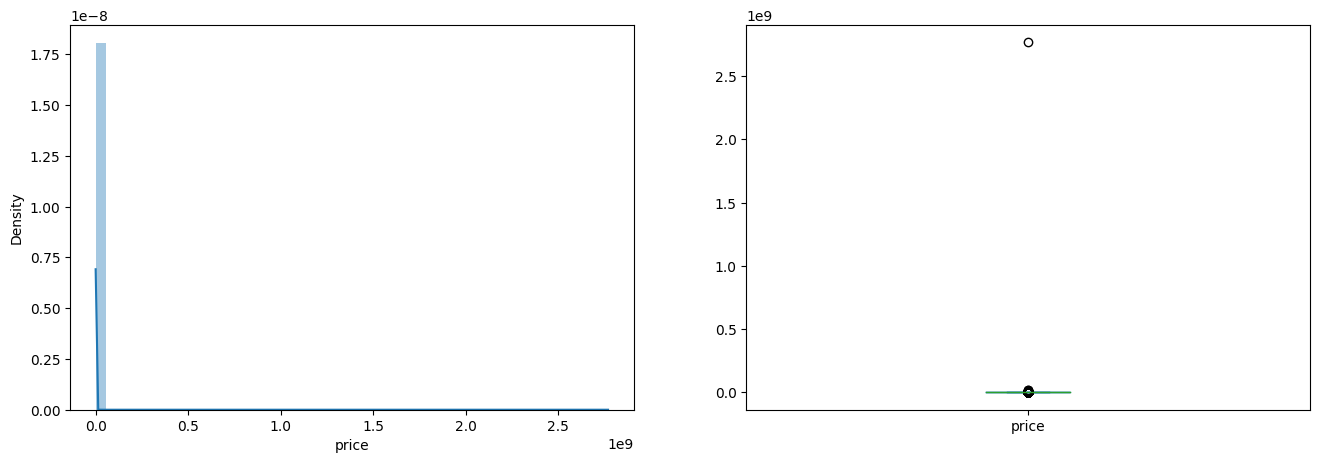

In [63]:
plt.subplot(121)
sns.distplot(rental["price"]);

plt.subplot(122)
rental["price"].plot.box(figsize=(16,5))

plt.show()

In [66]:
# limit the rentalPerMonth to be less than or equal to RM10,000
rentalunder10000 = rental[rental["price"] <= 10000].reset_index(drop=True)

print("Data type is {0} \n\nShape of dataframe is {1}\n".format(type(rentalunder10000), rentalunder10000.shape))

Data type is <class 'pandas.core.frame.DataFrame'> 

Shape of dataframe is (157590, 10)



In [68]:
with pd.option_context('float_format', '{:f}'.format): print(rentalunder10000["price"].describe())

count   157590.000000
mean      1270.133543
std        680.620953
min          1.000000
25%        830.000000
50%       1095.000000
75%       1507.000000
max      10000.000000
Name: price, dtype: float64


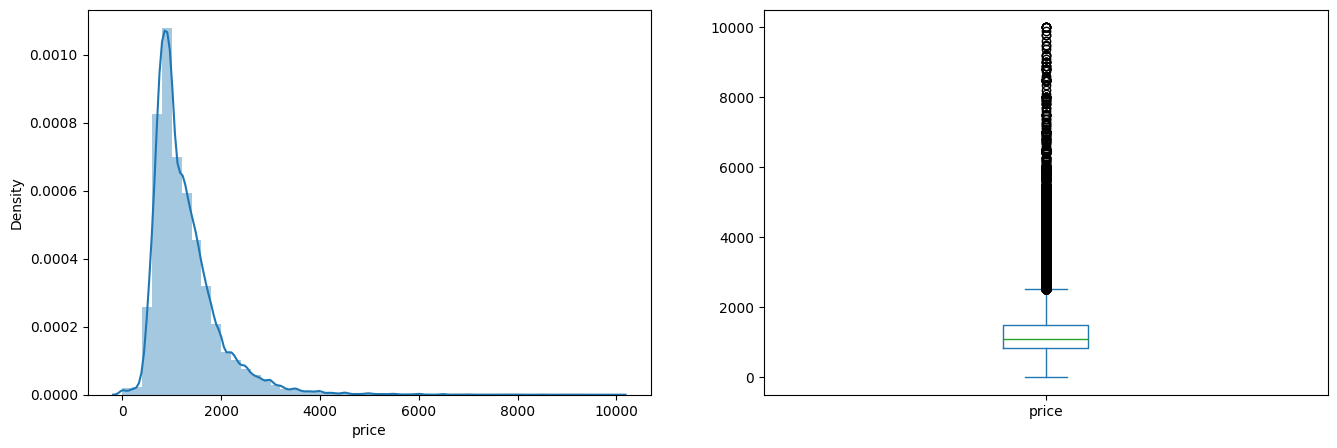

In [70]:
# create distribution plot and boxplot to check for outliers

plt.subplot(121)
sns.distplot(rentalunder10000["price"]);

plt.subplot(122)
rentalunder10000["price"].plot.box(figsize=(16,5))

plt.savefig("distribution.png", bbox_inches="tight")

plt.show()

In [72]:
# limit the rentalPerMonth to be less than or equal to RM10,000
rentalunder6000 = rental[rental["price"] <= 6000].reset_index(drop=True)

print("Data type is {0} \n\nShape of dataframe is {1}\n".format(type(rentalunder6000), rentalunder6000.shape))

Data type is <class 'pandas.core.frame.DataFrame'> 

Shape of dataframe is (157415, 10)



In [73]:
with pd.option_context('float_format', '{:f}'.format): print(rentalunder6000["price"].describe())

count   157415.000000
mean      1263.257383
std        647.927538
min          1.000000
25%        830.000000
50%       1095.000000
75%       1504.000000
max       6000.000000
Name: price, dtype: float64


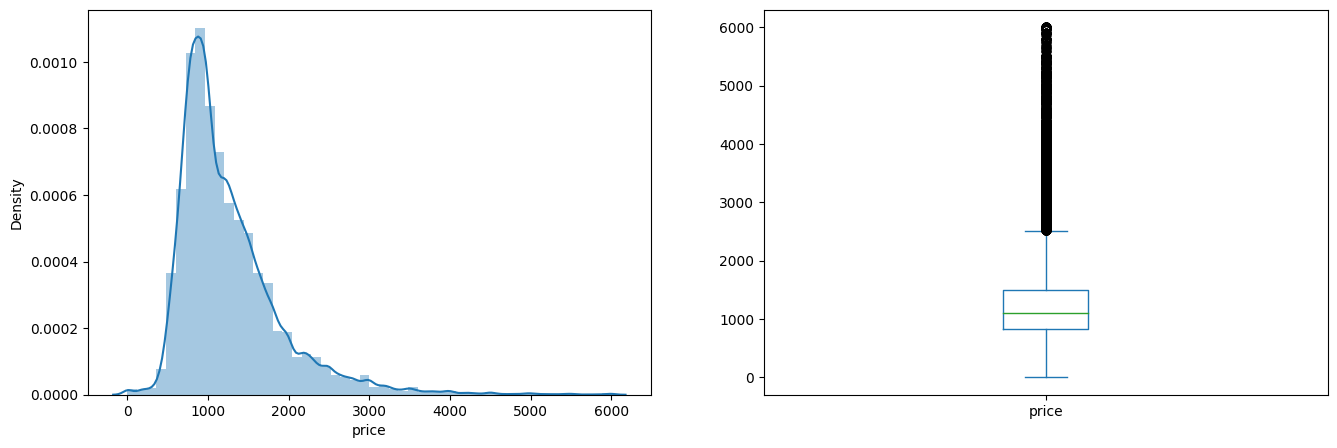

In [75]:
# create distribution plot and boxplot to check for outliers

plt.subplot(121)
sns.distplot(rentalunder6000["price"]);

plt.subplot(122)
rentalunder6000["price"].plot.box(figsize=(16,5))

plt.savefig("distribution.png", bbox_inches="tight")

plt.show()

In [76]:
rentalunder6000.head()

,sqfeet,beds,baths,parking_options,state,region,comes_furnished,type,price,laundry_options
0,1908,3,2.0,street parking,al,birmingham,0,apartment,1195.0,laundry on site
1,1319,3,2.0,off-street parking,al,birmingham,0,apartment,1120.0,laundry on site
2,1133,1,1.5,street parking,al,birmingham,0,apartment,825.0,laundry on site
3,927,1,1.0,street parking,al,birmingham,0,apartment,800.0,laundry on site
4,1047,2,1.0,street parking,al,birmingham,0,apartment,785.0,laundry on site


In [78]:
# renaming rental under 6000 to rentaldf
rentaldf = pd.DataFrame(rentalunder6000)
rentaldf.head()

,sqfeet,beds,baths,parking_options,state,region,comes_furnished,type,price,laundry_options
0,1908,3,2.0,street parking,al,birmingham,0,apartment,1195.0,laundry on site
1,1319,3,2.0,off-street parking,al,birmingham,0,apartment,1120.0,laundry on site
2,1133,1,1.5,street parking,al,birmingham,0,apartment,825.0,laundry on site
3,927,1,1.0,street parking,al,birmingham,0,apartment,800.0,laundry on site
4,1047,2,1.0,street parking,al,birmingham,0,apartment,785.0,laundry on site


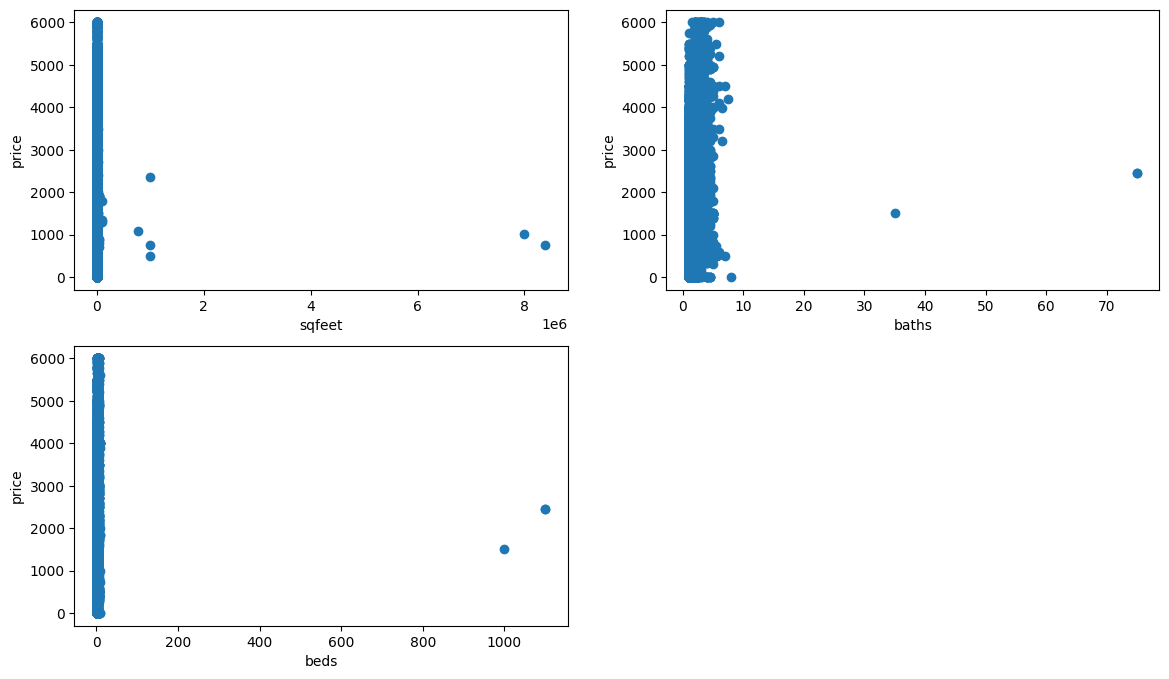

In [81]:
# visualize the relationship using scatter plots

plt.figure(figsize=(14, 8))

plt.subplot(2, 2, 1)
plt.scatter(x=rentaldf["sqfeet"], y=rentaldf["price"])
plt.xlabel("sqfeet")
plt.ylabel("price")

plt.subplot(2, 2, 3)
plt.scatter(x=rentaldf["beds"], y=rentaldf["price"])
plt.xlabel("beds")
plt.ylabel("price")

plt.subplot(2, 2, 2)
plt.scatter(x=rentaldf["baths"], y=rentaldf["price"])
plt.xlabel("baths")
plt.ylabel("price")

plt.savefig("scatterplots.png", bbox_inches="tight")
plt.show()

In [87]:
with pd.option_context('float_format', '{:f}'.format): print(rentaldf["beds"].describe())
with pd.option_context('float_format', '{:f}'.format): print(rentaldf["baths"].describe())
with pd.option_context('float_format', '{:f}'.format): print(rentaldf["sqfeet"].describe())

count   157412.000000
mean         1.974824
std          0.829551
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          8.000000
Name: beds, dtype: float64
count   157412.000000
mean         1.498288
std          0.580267
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          8.000000
Name: baths, dtype: float64
count    157412.000000
mean       1156.895853
std       29609.818784
min           1.000000
25%         771.000000
50%         960.000000
75%        1171.000000
max     8388607.000000
Name: sqfeet, dtype: float64


In [88]:
# limit the bed room number, bathroom and sqfeet 
rentaldf = rentaldf[rentaldf["beds"] <= 10].reset_index(drop=True)
rentaldf = rentaldf[rentaldf["baths"] <= 10].reset_index(drop=True)
rentaldf = rentaldf[rentaldf["sqfeet"] <= 40000].reset_index(drop=True)

In [90]:
with pd.option_context('float_format', '{:f}'.format): print(rentaldf["beds"].describe())
with pd.option_context('float_format', '{:f}'.format): print(rentaldf["baths"].describe())
with pd.option_context('float_format', '{:f}'.format): print(rentaldf["sqfeet"].describe())

print("Data type is {0} \n\nShape of dataframe is {1}\n".format(type(rentaldf), rentaldf.shape))

count   157394.000000
mean         1.974808
std          0.829545
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          8.000000
Name: beds, dtype: float64
count   157394.000000
mean         1.498281
std          0.580264
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          8.000000
Name: baths, dtype: float64
count   157394.000000
mean      1024.148417
std        448.337253
min          1.000000
25%        771.000000
50%        960.000000
75%       1171.000000
max      24000.000000
Name: sqfeet, dtype: float64
Data type is <class 'pandas.core.frame.DataFrame'> 

Shape of dataframe is (157394, 10)



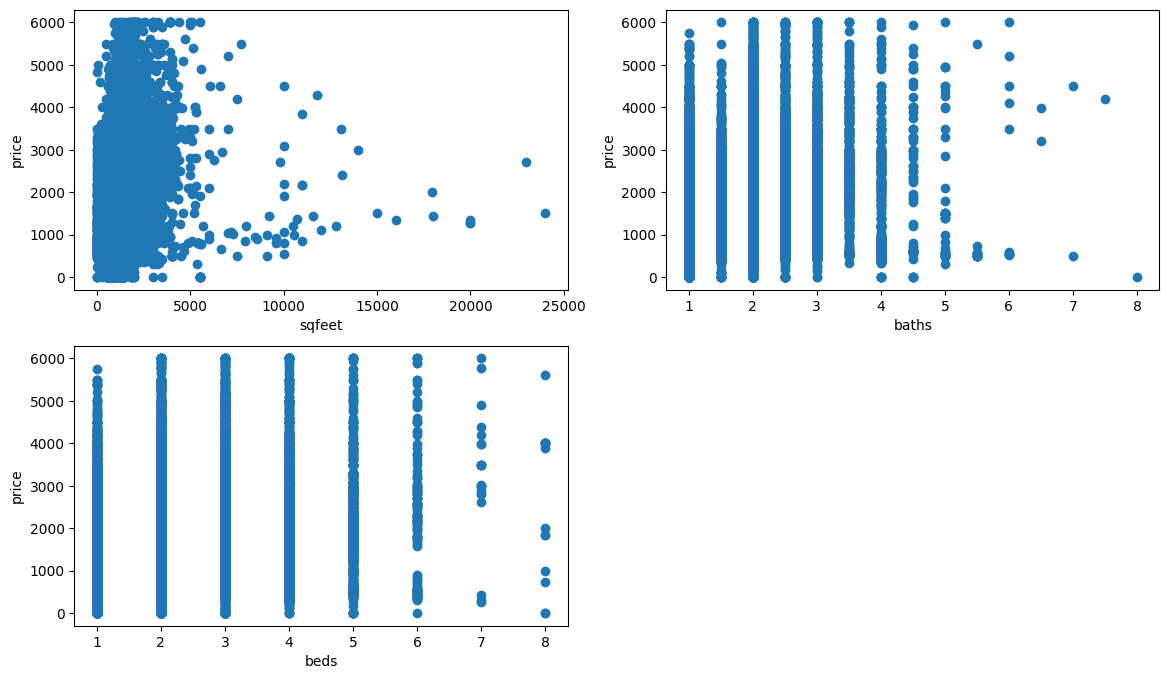

In [91]:
# visualize the relationship using scatter plots

plt.figure(figsize=(14, 8))

plt.subplot(2, 2, 1)
plt.scatter(x=rentaldf["sqfeet"], y=rentaldf["price"])
plt.xlabel("sqfeet")
plt.ylabel("price")

plt.subplot(2, 2, 3)
plt.scatter(x=rentaldf["beds"], y=rentaldf["price"])
plt.xlabel("beds")
plt.ylabel("price")

plt.subplot(2, 2, 2)
plt.scatter(x=rentaldf["baths"], y=rentaldf["price"])
plt.xlabel("baths")
plt.ylabel("price")

plt.savefig("scatterplots.png", bbox_inches="tight")
plt.show()

In [95]:
# calculate correlation matrix
corr = rentaldf[["sqfeet", "baths", "beds", "price"]].corr()
corr

,sqfeet,baths,beds,price
sqfeet,1.000000,0.592241,0.662783,0.339849
baths,0.592241,1.000000,0.652302,0.313352
beds,0.662783,0.652302,1.000000,0.224458
price,0.339849,0.313352,0.224458,1.000000


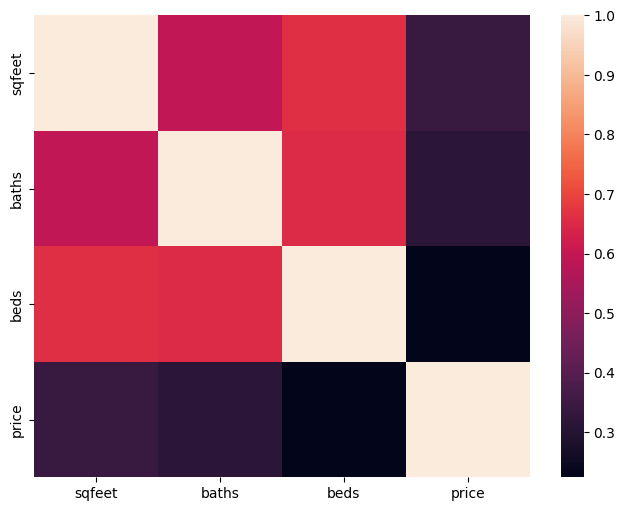

In [96]:
# visualize correlation matrix
plt.subplots(figsize=(8,6))

fig = sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

fig.get_figure().savefig("corr_heatmap.png", bbox_inches="tight") 

In [97]:
# one hot encoding
rentalEncode = pd.get_dummies(rentaldf)

rentalEncode.head()

,sqfeet,beds,baths,comes_furnished,price,parking_options_attached garage,parking_options_carport,parking_options_detached garage,parking_options_no parking,parking_options_off-street parking,...,type_in-law,type_land,type_loft,type_manufactured,type_townhouse,laundry_options_laundry in bldg,laundry_options_laundry on site,laundry_options_no laundry on site,laundry_options_w/d hookups,laundry_options_w/d in unit
0,1908,3,2.0,0,1195.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1319,3,2.0,0,1120.0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,1133,1,1.5,0,825.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,927,1,1.0,0,800.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1047,2,1.0,0,785.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [98]:
# check summary info to see if one hot encoding is done properly
print(rentalEncode.shape, "\n")
rentalEncode.info()

(157394, 363) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157394 entries, 0 to 157393
Columns: 363 entries, sqfeet to laundry_options_w/d in unit
dtypes: float64(2), int64(3), uint8(358)
memory usage: 59.7 MB


In [100]:
# separate data into X features and Y target
X = rentalEncode.drop(columns=["price"])
Y = rentalEncode["price"]

In [101]:
# split data into random train and test subsets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [106]:
# fit a Linear Regression Model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
regressor.score(X_train, y_train)

0.7098455326572874

In [103]:
# make predictions
y_pred = regressor.predict(X_test)

In [112]:
def predict_price(sqfeet, baths, beds):
#     loc_index = np.where(X.columns==region)[0][0]
    x = np.zeros(len(X.columns))
    x[0] = sqfeet
    x[1] = baths
    x[2] = beds
#     if loc_index >= 0:
#         x[loc_index] = 1
        
    return regressor.predict([x])[0]

In [113]:
predict_price(1900, 3, 2)

-18372157923.608982